In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install --upgrade seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
  Using cached seaborn-0.13.1-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.1-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.1 which is incompatible.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [2]:
df_train= pd.read_csv(r'C:\Users\Dell\Sales Price Prediction\train.csv')
df_test= pd.read_csv(r'C:\Users\Dell\Sales Price Prediction\test.csv')

In [3]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df_train.shape

(8523, 12)

In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [10]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [13]:
df_train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [14]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [19]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
pip install dtale


  Obtaining dependency information for dtale from https://files.pythonhosted.org/packages/c1/c3/766dc62ec7002289209c565638fb84120c420937157d24515b4575b1c7ac/dtale-3.9.0-py2.py3-none-any.whl.metadata
  Using cached dash_colorscales-0.0.4.tar.gz (62 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached dash_daq-0.5.0.tar.gz (642 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Flask-Compress from https://files.pythonhosted.org/packages/3f/d2/23fd656d38d4c896fa14371990b9978722c48a30d0edcf6b5f7054775a07/Flask_Compress-1.14-py3-none-any.whl.metadata
  Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
  Using cached strsimpy-0.2.1-py3-none-any.whl (45 kB)
     ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
     -------------------------------------- -

In [23]:
pip install --upgrade dtale


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/43/d0/f3cd75b62e1b90f48dbf091261b2fc7ceec14a700e308c50f6a69c83d337/scipy-1.11.4-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/44.1 MB 12.2 MB/s eta 0:00:04
   ---------------------------------------- 0.5/44.1 MB 7.3 MB/s eta 0:00:06
    --------------------------------------- 0.7/44.1 MB 8.8 MB/s eta 0:00:05
    --------------------------------------- 0.7/44.1 MB 8.8 MB/s eta 0:00:05
    --------------------------------------- 0.7/44.1 MB 8.8 MB/s eta 0:00:05
    --------------------------------------- 0.7/44.1 MB 8.8 MB/s eta 0:00:05
    --------------------------------------- 0.7/44.1 MB 8.8 MB/s eta 0:00:05
    -----------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\anaconda3\\Lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [25]:
pip install --user scipy

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.6.0
ansi2html                     1.9.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [21]:
pip install --upgrade statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/9a/b2/13833f94076dcc2709137fee92157ef5a0099a11ddff4f4b7cb301b35357/statsmodels-0.14.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.4 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.9 MB 3.3 MB/s eta 0:00:03
   - -------------------------------------- 0.3/9.9 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/9.9 MB 6.8 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.9 MB 5.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 MB 5.5 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.9 

In [21]:
import dtale

In [22]:
dtale.show(df_train)

In [24]:
pip install pandas-profiling

     ---------------------------------------- 0.0/262.6 kB ? eta -:--:--
     ---------------- --------------------- 112.6/262.6 kB 3.2 MB/s eta 0:00:01
     -------------------------------------  256.0/262.6 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 262.6/262.6 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/309.8 kB ? eta -:--:--
     -------------------------------------- 309.8/309.8 kB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/102.4 kB ? eta -:--:--
     -------------------------------------- 102.4/102.4 kB 5.8 MB/s eta 0:00:00
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for phik>=0.11.1 from https://files.pythonhosted.org/packages/95/e3/250ce99ed761389028543fcb876176ba619f6bf387d6cce3bab736bd92cc/phik-0.12.4-cp311-cp311-win_amd64.whl.metadata
  Using cached tangled_

In [23]:
pip install statsmodels pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
annotated-types               0.6.0
ansi2html                     1.9.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [24]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/a2/19/c58a6c22a04806c70802518eaf70866e5633fe47e671ded361295dfaf839/ydata_profiling-4.6.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/dd/b7/9aea7ee6c01fe3f3c03b8ca3c7797c866df5fecece9d6cb27caa138db2e2/pydantic-2.5.3-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/65.6 kB ? eta -:--:--
     ---------------------------------------- 65.6/65.6 kB 1.8 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Obtaining dependency information for typeguard<5,>=4.1.2 from https://files.pythonhosted.org/packages/18/01/5fc45558268ced46d86292763477996a3cdd505567cd590a688e8cdc386e/typeguard-4.1.5-py3-none-any.whl.metadata
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f02296740

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\anaconda3\\Lib\\site-packages\\~ydantic\\annotated_types.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [25]:
pip install --user ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/a2/19/c58a6c22a04806c70802518eaf70866e5633fe47e671ded361295dfaf839/ydata_profiling-4.6.4-py2.py3-none-any.whl.metadata
  Using cached ydata_profiling-4.6.4-py2.py3-none-any.whl.metadata (20 kB)
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Obtaining dependency information for wordcloud>=1.9.1 from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached ydata_profiling-4.6.4-py2.py3-none-any.whl (357 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [23]:
from ydata_profiling import ProfileReport

2024-01-11 15:32:05,982 - INFO     - Pandas backend loaded 2.1.4
2024-01-11 15:32:06,019 - INFO     - Numpy backend loaded 1.24.3
2024-01-11 15:32:06,023 - INFO     - Pyspark backend NOT loaded
2024-01-11 15:32:06,032 - INFO     - Python backend loaded


In [24]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [25]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
np_bool_variable = np.array([True, False], dtype=np.bool_)

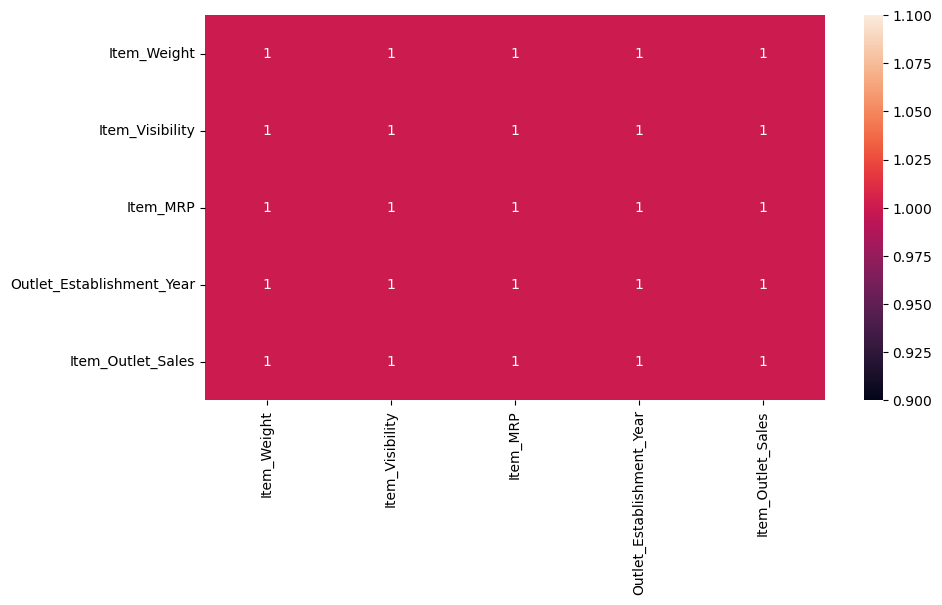

In [26]:
# Select only numeric columns from df_train
# Select only numeric columns from df_train
numeric_df = df_train.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))

# Replace np.bool with bool in the seaborn heatmap function
correlation_matrix = correlation_matrix.astype(bool)
sns.heatmap(correlation_matrix, annot=True)

plt.show()


# EDA USING KLIB LIBRARY

In [26]:
pip install klib


  Obtaining dependency information for klib from https://files.pythonhosted.org/packages/96/d5/4978eb763ed5dea42633df2ff2db9893bd70091ca5469383b3da7b8352f7/klib-1.1.2-py3-none-any.whl.metadata


In [27]:
pip install seaborn==0.12.2

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install ruamel.yaml

In [34]:
pip install Jinja2==3.0.3


Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install visions==0.7.4


  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [33]:
pip install --upgrade pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install --user markupsafe==1.1.1

Note: you may need to restart the kernel to use updated packages.


In [27]:
import klib

GridSpec(6, 5)

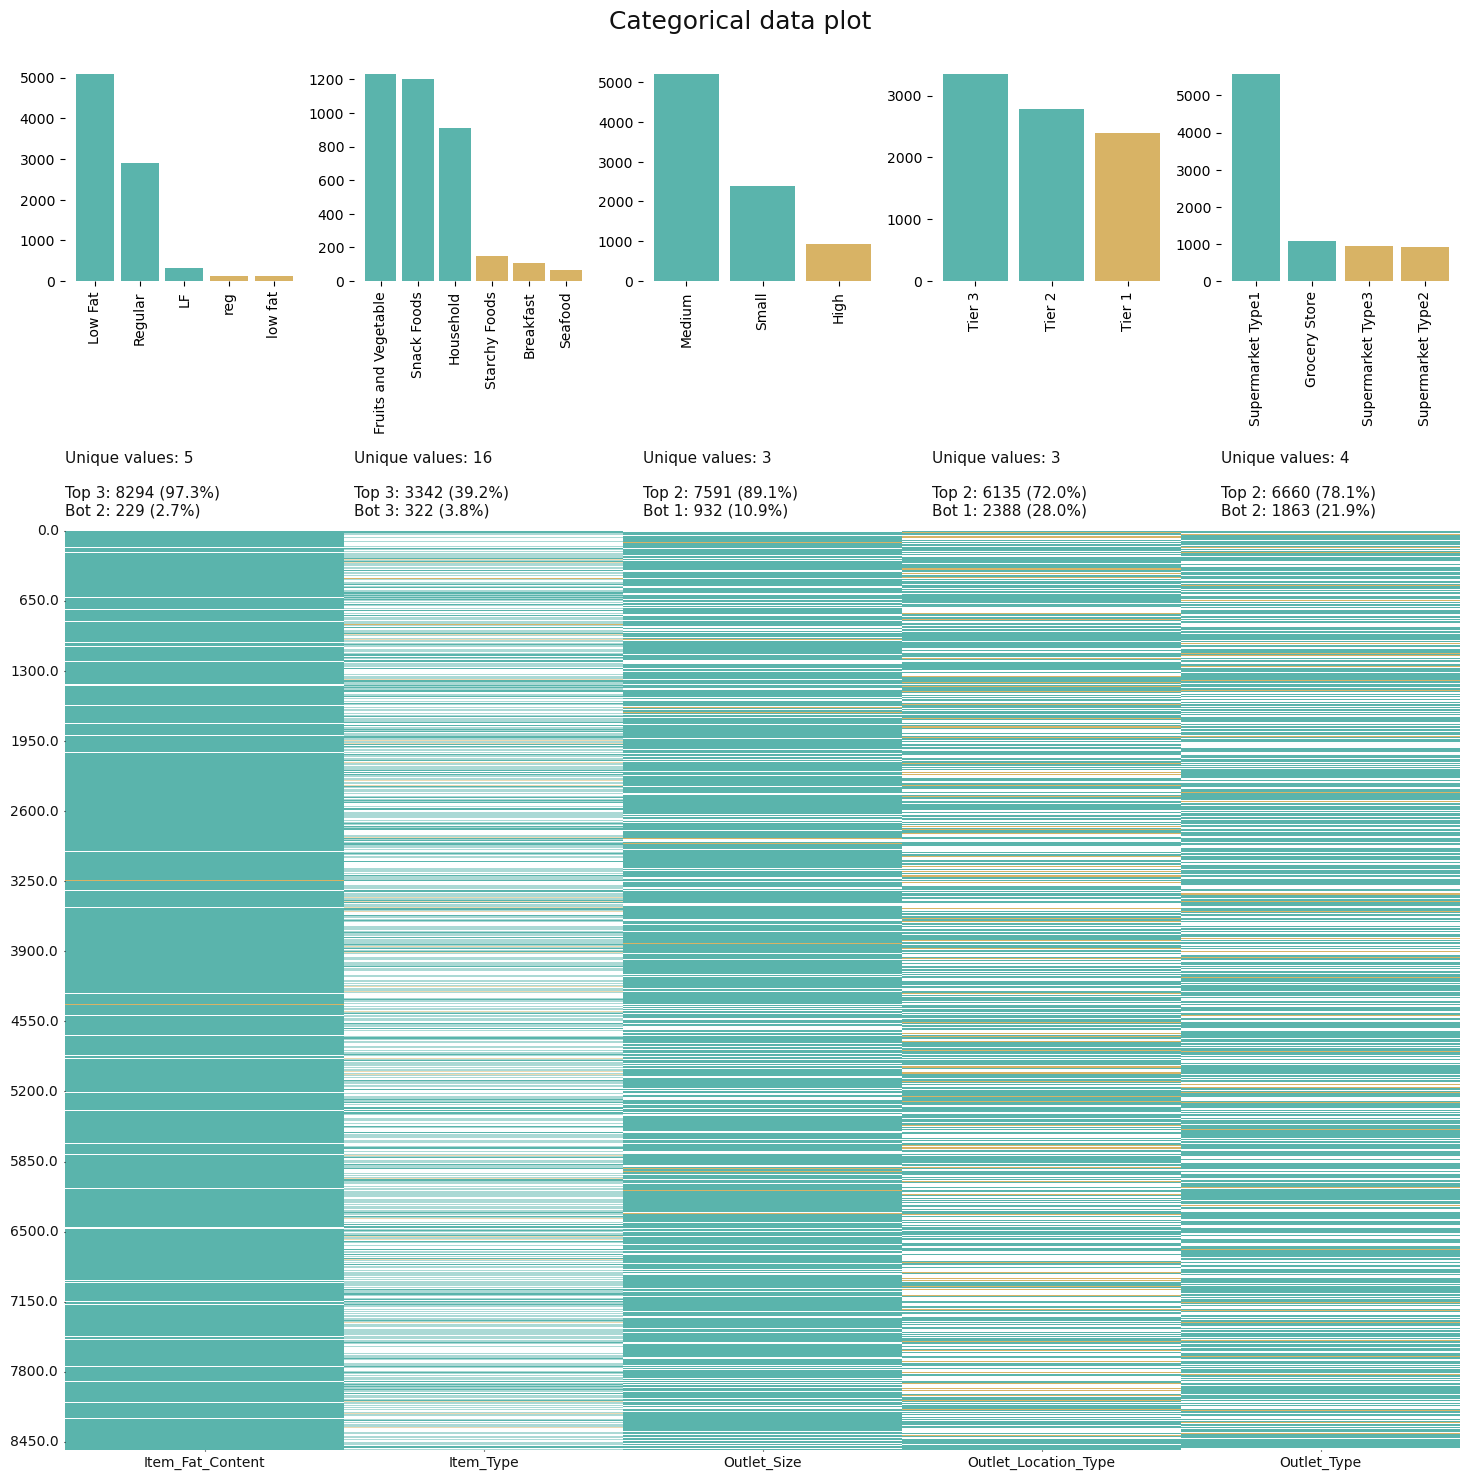

In [28]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features

In [31]:
pip install --upgrade seaborn==0.10.1

     ---------------------------------------- 0.0/215.5 kB ? eta -:--:--
     ------------------- ------------------ 112.6/215.5 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 215.5/215.5 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.
klib 1.1.2 requires seaborn>=0.11.2, but you have seaborn 0.10.1 which is incompatible.


In [30]:
pip install --upgrade jinja2

  Obtaining dependency information for jinja2 from https://files.pythonhosted.org/packages/30/6d/6de6be2d02603ab56e72997708809e8a5b0fbfee080735109b40a3564843/Jinja2-3.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/133.2 kB ? eta -:--:--
   ------------------------ --------------- 81.9/133.2 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 133.2/133.2 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.0.3
    Uninstalling Jinja2-3.0.3:
      Successfully uninstalled Jinja2-3.0.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.1 which is incompatible.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [29]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

C:\Users\Dell\anaconda3\Lib\site-packages\klib\describe.py:271: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

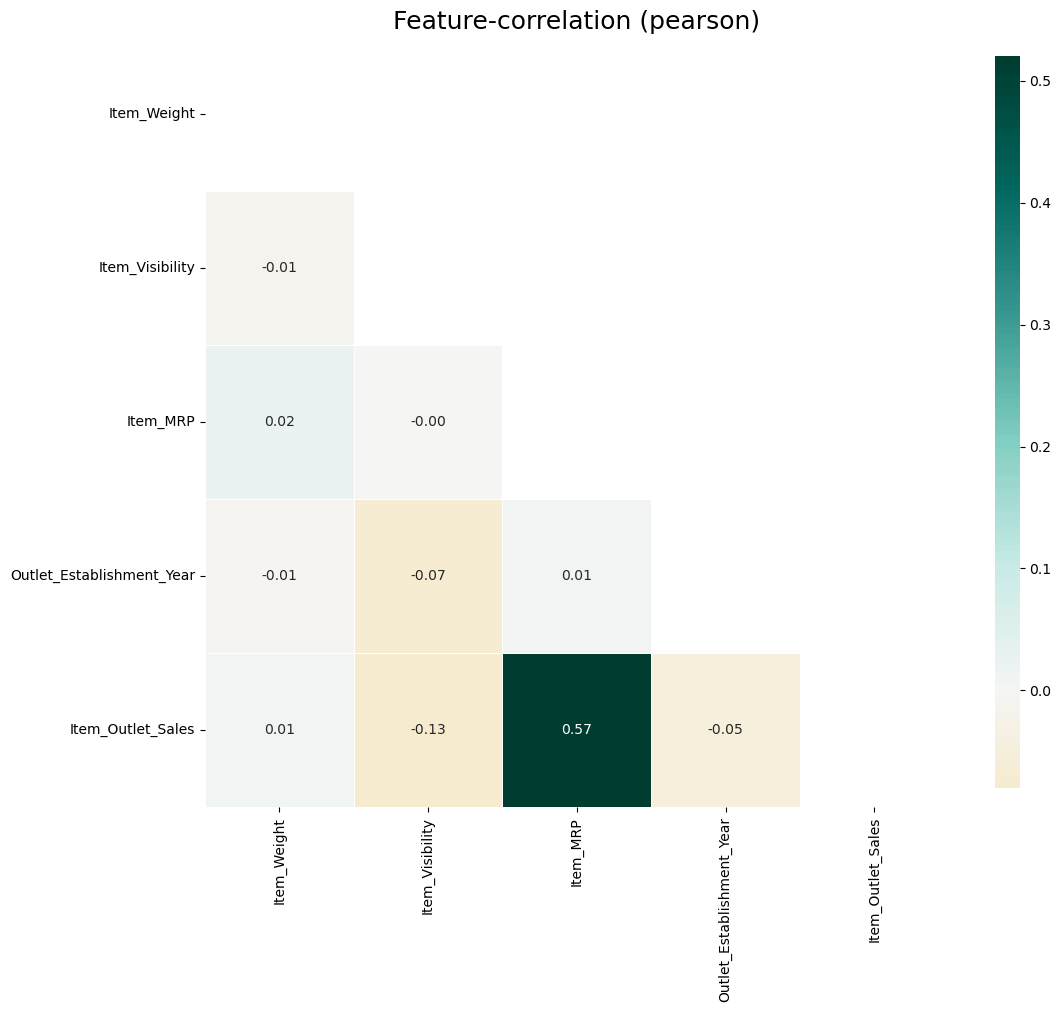

In [23]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations

In [25]:
pip install --user --upgrade klib pandas seaborn


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/11/17/fb1a34f3e73debbc2fd15a01ea17eaab3717943d08463ff4979a4f024b3f/pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata
  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/2d/46/cf3fce41ffc543b6e94dadbe6b647559d591df446ec716e72c3b4ce71b34/seaborn-0.13.1-py3-none-any.whl.metadata
  Using cached seaborn-0.13.1-py3-none-any.whl.metadata (5.4 kB)
Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached seaborn-0.13.1-py3-none-any.whl (294 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.4 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.1 which is incompatible.
ydata-profiling 4.6.4 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [30]:
import klib
import numpy as np
# Convert the DataFrame column to a NumPy array
data_array = np.array(df_train)

# Create the distribution plot
klib.dist_plot(data_array)
 # returns a distribution plot for every numeric feature

No columns with numeric data were detected.


In [31]:
 klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning Using K Library

In [32]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [33]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [35]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [36]:
klib.mv_col_handling(df_train)

C:\Users\Dell\anaconda3\Lib\site-packages\klib\clean.py:436: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.920000,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.500000,Low Fat,0.016760,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.270020
3,19.200001,Regular,0.000000,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.930000,Low Fat,0.000000,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.380000,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.600000,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.210000,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


# Preprocessing Task before Model Building
1) Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [39]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300000,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.920000,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.500000,1,0.016760,10,141.617996,1999,1,0,1,2097.270020
3,19.200001,2,0.000000,6,182.095001,1998,1,2,0,732.380005
4,8.930000,1,0.000000,9,53.861401,1987,0,2,1,994.705200
...,...,...,...,...,...,...,...,...,...,...
8518,6.865000,1,0.056783,13,214.521805,1987,0,2,1,2778.383301
8519,8.380000,2,0.046982,0,108.156998,2002,1,1,1,549.284973
8520,10.600000,1,0.035186,8,85.122398,2004,2,1,1,1193.113647
8521,7.210000,2,0.145221,13,103.133202,2009,1,2,2,1845.597656


# Splitting Our Data into Train and Test  Set

In [40]:
X=df_train.drop('item_outlet_sales',axis=1)

In [41]:
Y=df_train['item_outlet_sales']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# Standarization

In [43]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857646,1.369354,0.066132,7.226681,140.992767,1997.831867,1.170832,1.112871,1.201220
std,4.226130,0.644810,0.051598,4.209990,62.275051,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012802,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.000000,2.000000,3.000000


In [44]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [45]:
X_train_std= sc.fit_transform(X_train)

In [46]:
X_test_std= sc.transform(X_test)

In [47]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [48]:
X_test_std

array([[-0.43860916, -0.57382672, -0.21609253, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570184, -0.57382672, -0.52943464, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.2184578 ,  0.97378032,  0.16277341, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508101, -0.57382672,  0.8782423 , ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171909, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558541,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [49]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [50]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [51]:
import joblib

In [52]:
joblib.dump(sc,r'C:\Users\Dell\Sales Price Prediction\Model\sc.sav')

['C:\\Users\\Dell\\Sales Price Prediction\\Model\\sc.sav']

# Model Building 

In [53]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [54]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [55]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
8179,11.000000,1,0.055163,8,100.335800,2009,1,2,2
8355,18.000000,1,0.038979,13,148.641800,1987,0,2,1
3411,7.720000,2,0.074731,1,77.598602,1997,2,0,1
7089,20.700001,1,0.049035,6,39.950600,2007,1,1,1
6954,7.550000,1,0.027225,3,152.934006,2002,1,1,1


In [56]:
Y_pred_lr=lr.predict(X_test_std)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [58]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875773270634
880.99990440845
1162.4412631603452


In [59]:
joblib.dump(lr,r'C:\Users\Dell\Sales Price Prediction\Model\lr.sav')

['C:\\Users\\Dell\\Sales Price Prediction\\Model\\lr.sav']

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [61]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [62]:
Y_pred_rf=rf.predict(X_test_std)

In [63]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5492640606365315
782.7145151308189
1108.3410271466817


# Hyperparameter Tuning

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.550 using {'n_estimators': 1000}
0.521 (0.013) with: {'n_estimators': 10}
0.549 (0.003) with: {'n_estimators': 100}
0.550 (0.005) with: {'n_estimators': 1000}


In [65]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [66]:
grid_search_forest.best_score_

0.5501722543502152

In [67]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [68]:
r2_score(Y_test,Y_pred_rf_grid)

0.5505369795754407

# Save Your Model

In [69]:
import joblib

In [70]:
joblib.dump(grid_search_forest,r'C:\Users\Dell\Sales Price Prediction\Model\random_forest_grid.sav')

['C:\\Users\\Dell\\Sales Price Prediction\\Model\\random_forest_grid.sav']

In [71]:
model=joblib.load(r'C:\Users\Dell\Sales Price Prediction\Model\random_forest_grid.sav')

2024-01-11 16:31:49,780 - INFO     - Executing shutdown due to inactivity...
2024-01-11 16:31:54,665 - INFO     - Executing shutdown...
2024-01-11 16:31:54,675 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer
